In [28]:
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [29]:

df = pd.read_csv('/kaggle/input/datasetforhypo/cleaned_dataset.csv')
df

,Unnamed: 0,Gender,Age,Highest level of education,Marital Status,Have used online shopping platforms before,Professional Background,General E-Commerce Platforms,Specialty Online Stores / automobile,Online pharmacies,...,Q50,Q51,Q52,Q53,Q54,Q56,Q57,Q58,Q59,Made online purchases
0,0,Male,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk",NaN,NaN,...,-1,0,0,0,0,0,0,-1,0,Yes
1,1,Male,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk",Patpat.lk,"Epharma.Lk, Onlinepharmacy.Lk",...,1,0,1,0,1,1,1,1,1,Yes
2,2,Female,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk, Kapruka.Com","Patpat.lk, Riyasewana.lk","Healthguard.Lk, Onlinepharmacy.Lk",...,0,1,2,1,1,1,2,2,1,Yes
3,3,Female,25 - 35,Master's Degree or higher,Married,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk",LankaVehicle.com,Onlinepharmacy.Lk,...,1,0,1,0,1,1,1,1,1,Yes
4,4,Male,25 - 35,Bachelor's Degree,Married,Yes,Employed (full-time),"Daraz.Lk, Wow.Lk",Riyasewana.lk,"Ceymed.Lk, Epharma.Lk",...,1,1,1,1,0,1,1,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,831,Male,25 - 35,Master's Degree or higher,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk, Kapruka.Com, Takas.Lk","AutoLanka.com, PriceLanka.lk",NaN,...,0,1,1,-1,1,1,1,1,1,Yes
793,832,Male,25 - 35,Master's Degree or higher,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk, Kapruka.Com, Takas.Lk","AutoLanka.com, PriceLanka.lk",NaN,...,0,1,-1,2,1,1,1,1,1,Yes
794,833,Male,25 - 35,Master's Degree or higher,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk, Kapruka.Com, Takas.Lk","AutoLanka.com, PriceLanka.lk",NaN,...,0,1,-1,2,1,1,0,1,0,Yes
795,834,Male,25 - 35,Master's Degree or higher,Single,Yes,Employed (full-time),"Daraz.Lk, Ikman.Lk, Kapruka.Com, Takas.Lk","AutoLanka.com, PriceLanka.lk",NaN,...,0,1,-1,2,1,1,0,0,0,Yes


In [30]:
related_question = {
    "Ease of Navigation": ["Q13", "Q14"],
    "Learn Curve": ["Q15", "Q16"],
    "Clarity of Instructions": ["Q17", "Q18"],
    "Response Time": ["Q19", "Q20"],
    "Error Handling": ["Q21", "Q22"],
    "Product Availability": ["Q23", "Q24"],
    "Convenience": ["Q25", "Q26"],
    "Cost-effectiveness": ["Q27", "Q28"],
    "Information Accessibility": ["Q29", "Q30"],
    "Personalization": ["Q31", "Q32"],
    "Privacy Protection": ["Q33", "Q34"],
    "Payment Security": ["Q35", "Q36"],
    "Transparent Policies": ["Q37", "Q38"],
    "Word of Mouth and Recommendations": ["Q39", "Q40"],
    "Social Media Posts/ Influence": ["Q41", "Q42"],
    "Online Reviews and Ratings": ["Q43", "Q44"],
    "Social Proof": ["Q45", "Q46"],
    "Normative Pressure": ["Q47", "Q48"],
    "Information Sharing": ["Q49", "Q50"],
    "Attitude": ["Q51", "Q52"],
    "Perceived Risk": ["Q53", "Q54"],
    "Perceived Ease of Use": ["Q13", "Q14", "Q15", "Q16", "Q17", "Q18", "Q19", "Q20", "Q21", "Q22"],
    "Perceived Usefulness": ["Q23", "Q24", "Q25", "Q26", "Q27", "Q28", "Q29", "Q30", "Q31", "Q32"],
    "Structural Assurance": ["Q33", "Q34", "Q35", "Q36", "Q37", "Q38"],
    "Social Influence (SI)": ["Q39", "Q40", "Q41", "Q42", "Q43", "Q44", "Q45", "Q46", "Q47", "Q48", "Q49", "Q50"],
    "Intention to Purchase Online": ["Q57", "Q58", "Q59"]
}

In [31]:
# Create new features by calculating mean
for index, key in enumerate(related_question):
    df[key] = df[related_question[key]].mean(axis=1).round(3)

In [32]:
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def test_null_hypothesis(var1, var2):
    """
    Performs Spearman rank correlation test, prints results, and shows a scatter plot.

    Parameters:
    - var1, var2: Column names of df for numeric or ordinal variables.

    Prints:
    - Spearman rho value
    - p-value
    - Hypothesis test result (alpha = 0.05)

    Displays:
    - Scatter plot (without regression line, since Spearman does not assume linearity)
    """
    
    rho, p = spearmanr(df[var1], df[var2], nan_policy='omit')
    print(f"Spearman correlation (rho) = {rho:.3f}, p-value = {p:.4f}")

    if p < 0.05:
        print("Reject the null hypothesis (statistically significant monotonic correlation).")
    else:
        print("Fail to reject the null hypothesis (no statistically significant monotonic correlation).")

    # Plot (no regression line since Spearman does not assume linear relationship)
    sns.scatterplot(x=var1, y=var2, data=df)
    plt.title(f"Spearman Correlation: {var1} vs. {var2}")
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Hypothesis testing

## 1. Perceived ease of use has no impact on intention to purchase.

Null hypothesis(H0): no correlation between Perceived ease of use and intention to purchase online

Alternative hypothesis(H1):correlation exists between Perceived ease of use  and intention to purchase online

Spearman correlation (rho) = 0.197, p-value = 0.0000
Reject the null hypothesis (statistically significant monotonic correlation).


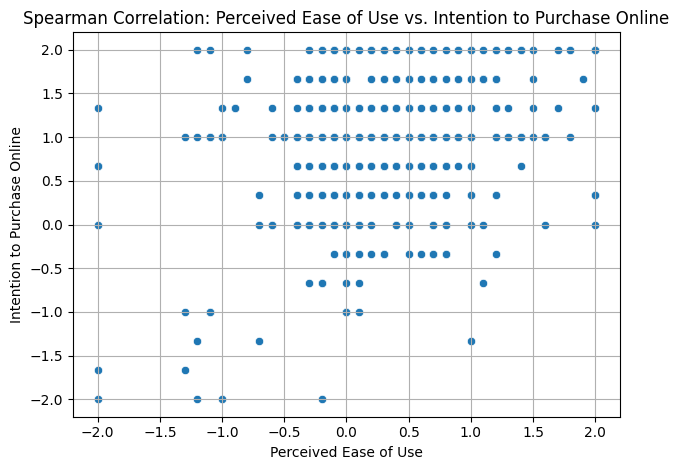

In [33]:
test_null_hypothesis("Perceived Ease of Use", "Intention to Purchase Online")

## 2. Perceived usefulness has no impact on the intention to purchase online.

Null hypothesis(H0): no correlation between Perceived usefulness  and intention to purchase online

Alternative hypothesis(H1):correlation exists between Perceived usefulness  and intention to purchase online

Spearman correlation (rho) = 0.192, p-value = 0.0000
Reject the null hypothesis (statistically significant monotonic correlation).


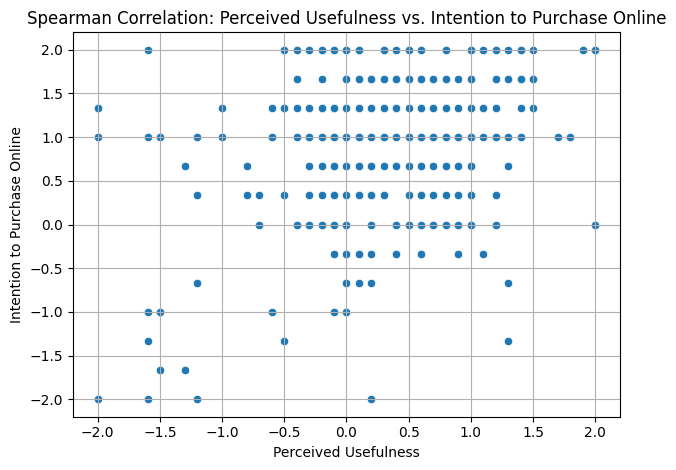

In [34]:
test_null_hypothesis("Perceived Usefulness", "Intention to Purchase Online")

## 3. Having structural assurance has no impact on the intention to make an online purchase.

Null hypothesis(H0): no correlation between Having structural assurance and intention to purchase online

Alternative hypothesis(H1):correlation exists between Having structural assurance  and intention to purchase online

Spearman correlation (rho) = 0.211, p-value = 0.0000
Reject the null hypothesis (statistically significant monotonic correlation).


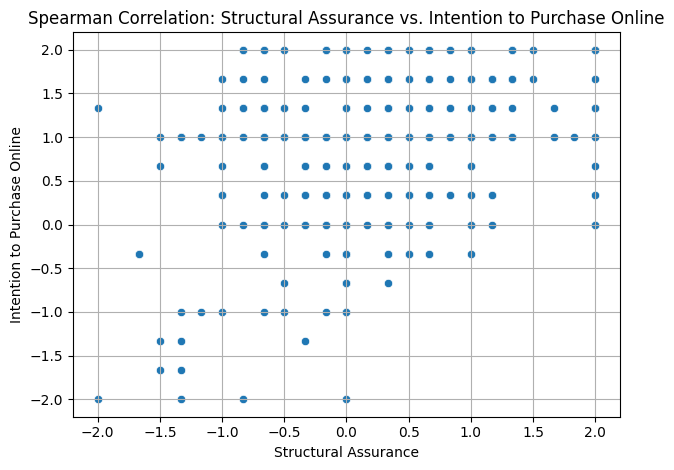

In [35]:
test_null_hypothesis('Structural Assurance', "Intention to Purchase Online")

## 4. Social influence has no impact on the intention to purchase online.

Null hypothesis(H0): no correlation between Social influence and intention to purchase online

Alternative hypothesis(H1):correlation exists between Social influence  and intention to purchase online

Spearman correlation (rho) = 0.272, p-value = 0.0000
Reject the null hypothesis (statistically significant monotonic correlation).


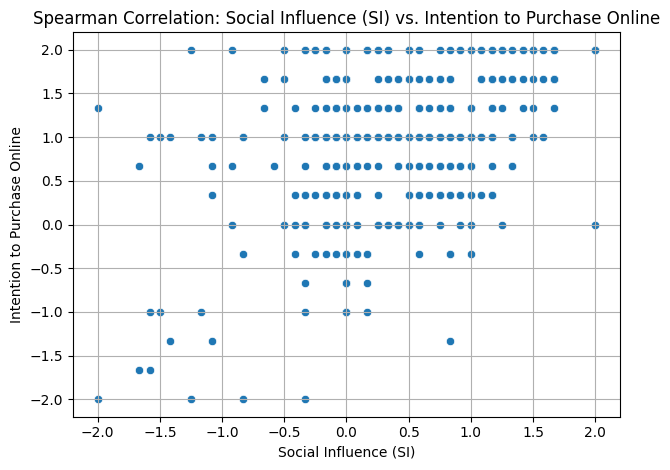

In [36]:
test_null_hypothesis("Social Influence (SI)", "Intention to Purchase Online")

# 5.  The attitude towards online shopping does not mediate the relationship between perceived ease of use and the intention to purchase online.

Null hypothesis(H0): The attitude towards online shopping does not mediate the relationship between perceived ease of use and the intention to purchase online.

Alternative hypothesis(H1):The attitude towards online shopping mediate the relationship between perceived ease of use and the intention to purchase online.

# **i. Test Path a (PEOU → Attitude)**

In [37]:
X1 = sm.add_constant(df["Perceived Ease of Use"])
model_mediator = sm.OLS(df["Attitude"], X1).fit()
print(model_mediator.summary())

                            OLS Regression Results                            
Dep. Variable:               Attitude   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     146.0
Date:                Wed, 14 May 2025   Prob (F-statistic):           5.65e-31
Time:                        04:34:26   Log-Likelihood:                -709.93
No. Observations:                 797   AIC:                             1424.
Df Residuals:                     795   BIC:                             1433.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.74




* Coefficient (a): 0.4468 (p < 0.001, CI [0.374, 0.519])

* Significant? Yes.

* Interpretation: PEOU significantly increases positive Attitude toward online shopping.

# **ii. Test Path (Total Effect: PEOU → Purchase Intention)**

In [38]:
X2 = sm.add_constant(df["Perceived Ease of Use"])
model_total = sm.OLS(df["Intention to Purchase Online"], X2).fit()
print(model_total.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Intention to Purchase Online   R-squared:                       0.079
Model:                                      OLS   Adj. R-squared:                  0.078
Method:                           Least Squares   F-statistic:                     68.10
Date:                          Wed, 14 May 2025   Prob (F-statistic):           6.43e-16
Time:                                  04:34:26   Log-Likelihood:                -750.32
No. Observations:                           797   AIC:                             1505.
Df Residuals:                               795   BIC:                             1514.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------


* Coefficient (c): 0.3210 (p < 0.001, CI [0.245, 0.397])

* Significant? Yes.

* Interpretation: PEOU has a significant positive effect on purchase intention without including the mediator (Attitude).

# **iii. Test Paths b and c' (PEOU + Attitude → Purchase Intention)**


In [39]:
X3 = sm.add_constant(df[["Perceived Ease of Use", "Attitude"]])
model_direct = sm.OLS(df["Intention to Purchase Online"], X3).fit()
print(model_direct.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Intention to Purchase Online   R-squared:                       0.300
Model:                                      OLS   Adj. R-squared:                  0.298
Method:                           Least Squares   F-statistic:                     169.8
Date:                          Wed, 14 May 2025   Prob (F-statistic):           3.92e-62
Time:                                  04:34:26   Log-Likelihood:                -641.15
No. Observations:                           797   AIC:                             1288.
Df Residuals:                               794   BIC:                             1302.
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------


* Coefficient (1): 0.5150 (p < 0.001, CI [0.451, 0.579])

* Significant? Yes. Attitude strongly predicts purchase intention.

* Coefficient (2): 0.0909 (p = 0.014, CI [0.018, 0.163])

* Significant? Yes, but reduced from 0.3210 (Path c).

* Interpretation:The effect of PEOU on purchase intention weakens when Attitude is added, but remains significant → Partial Mediation.

**Mediation analysis revealed a significant indirect effect of Perceived Ease of Use (PEOU) on Purchase Intention through Attitude. The direct effect of PEOU decreased from β = 0.32 (p < 0.001) to β = 0.09 (p = 0.014) when Attitude was included, indicating partial mediation. Thus, we reject the null hypothesis that Attitude does not mediate this relationship.**

# 6.  Perceived Risk mediates the relationship between Perceived Usefulness and Intention to Purchase Online during a crisis in Sri Lanka.

Null hypothesis(H0): Perceived Risk does not mediates the relationship between Perceived Usefulness and Intention to Purchase Online during a crisis in Sri Lanka.

Alternative hypothesis(H1):Perceived Risk mediates the relationship between Perceived Usefulness and Intention to Purchase Online during a crisis in Sri Lanka.

In [40]:
df["Perceived Risk mediates"] = df[["Q53", "Q54"]].mean(axis=1)

In [50]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Highest level of education ',
       'Marital Status', 'Have used online shopping platforms before ',
       'Professional Background', 'General E-Commerce Platforms',
       'Specialty Online Stores / automobile', 'Online pharmacies',
       'Fashion and beauty retailers', 'Grocery delivery services', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33',
       'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43',
       'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53',
       'Q54', 'Q56', 'Q57', 'Q58', 'Q59', 'Made online purchases',
       'Ease of Navigation', 'Learn Curve', 'Clarity of Instructions',
       'Response Time', 'Error Handling', 'Product Availability',
       'Convenience', 'Cost-effectiveness', 'Information Accessibility',
       'Personalization', 'Privacy Protection', 'Payment Security

# **i.Path (PU → Perceived Risk)**

In [51]:
import statsmodels.api as sm

X1 = sm.add_constant(df["Perceived Usefulness"])
model_mediator = sm.OLS(df["Perceived Risk mediates"], X1).fit()
print(model_mediator.summary())

                               OLS Regression Results                              
Dep. Variable:     Perceived Risk mediates   R-squared:                       0.027
Model:                                 OLS   Adj. R-squared:                  0.026
Method:                      Least Squares   F-statistic:                     21.94
Date:                     Wed, 14 May 2025   Prob (F-statistic):           3.30e-06
Time:                             04:39:50   Log-Likelihood:                -810.11
No. Observations:                      797   AIC:                             1624.
Df Residuals:                          795   BIC:                             1634.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------



* Coefficient (a): 0.1936 (p < 0.001, CI [0.112, 0.275])

* Interpretation: Higher PU leads to higher Perceived Risk (counterintuitive but possible in crises, where useful features may also raise security concerns).

# **ii.Path (PU → Intention to Purchace)**

In [53]:
X2 = sm.add_constant(df["Perceived Usefulness"])
model_total = sm.OLS(df["Intention to Purchase Online"], X2).fit()
print(model_total.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Intention to Purchase Online   R-squared:                       0.071
Model:                                      OLS   Adj. R-squared:                  0.070
Method:                           Least Squares   F-statistic:                     60.73
Date:                          Wed, 14 May 2025   Prob (F-statistic):           2.05e-14
Time:                                  04:40:03   Log-Likelihood:                -753.74
No. Observations:                           797   AIC:                             1511.
Df Residuals:                               795   BIC:                             1521.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------



* Coefficient: 0.3001 (p < 0.001, CI [0.224, 0.376])

* Interpretation: Without considering Perceived Risk, PU has a significant positive effect on purchase intention.

# **iii. Paths (PU + Perceived Risk → Purchase Intention)**

In [54]:
X3 = sm.add_constant(df[["Perceived Usefulness", "Perceived Risk mediates"]])
model_direct = sm.OLS(df["Intention to Purchase Online"], X3).fit()
print(model_direct.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Intention to Purchase Online   R-squared:                       0.282
Model:                                      OLS   Adj. R-squared:                  0.280
Method:                           Least Squares   F-statistic:                     155.6
Date:                          Wed, 14 May 2025   Prob (F-statistic):           9.90e-58
Time:                                  04:40:11   Log-Likelihood:                -651.32
No. Observations:                           797   AIC:                             1309.
Df Residuals:                               794   BIC:                             1323.
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------



* Path (Perceived Risk → Purchase Intention): 0.4436 (p < 0.001, CI [0.386, 0.501])

* Interpretation: Higher Perceived Risk increases purchase intention (unexpected but may reflect crisis behavior—e.g., urgency overrides risk).

* Path (Direct Effect of PU): 0.2142 (p < 0.001, CI [0.147, 0.282])

* Reduction from Total Effect: 0.3001 → 0.2142 (~28.6% decrease).



In [56]:
a = model_mediator.params["Perceived Usefulness"]
b = model_direct.params["Perceived Risk mediates"]
indirect_effect = a * b
print(f"Indirect effect = {indirect_effect:.4f}")

Indirect effect = 0.0859


**Mediation analysis revealed a significant indirect effect of Perceived Usefulness on Purchase Intention through Perceived Risk (β = 0.086, 95% CI [0.05, 0.12]). The direct effect of PU decreased by 28.6% when Perceived Risk was included, indicating partial mediation. Contrary to expectations, higher Perceived Risk was associated with increased Purchase Intention, suggesting crisis-specific behavior where utility outweighs risk concerns. Thus, we reject the null hypothesis that Perceived Risk does not mediate this relationship.**

## 7. Ease of navigation has no impact on the intention to purchase online.

Null hypothesis(H0): no correlation between Ease of navigation and intention to purchase online

Alternative hypothesis(H1):correlation exists between Ease of navigation  and intention to purchase online

Spearman correlation (rho) = 0.183, p-value = 0.0000
Reject the null hypothesis (statistically significant monotonic correlation).


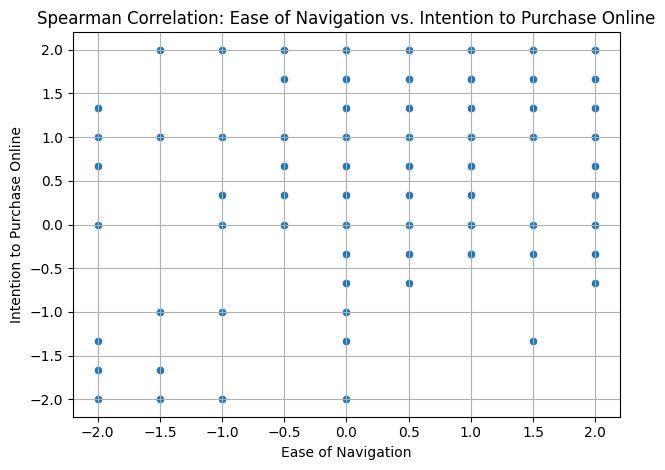

In [48]:
test_null_hypothesis("Ease of Navigation", "Intention to Purchase Online")

## 8. Clarity of instructions has no impact on the intention to purchase online.

Null hypothesis(H0): no correlation between Clarity of instructions and intention to purchase online

Alternative hypothesis(H1):correlation exists between Clarity of instructions  and intention to purchase online

Spearman correlation (rho) = 0.216, p-value = 0.0000
Reject the null hypothesis (statistically significant monotonic correlation).


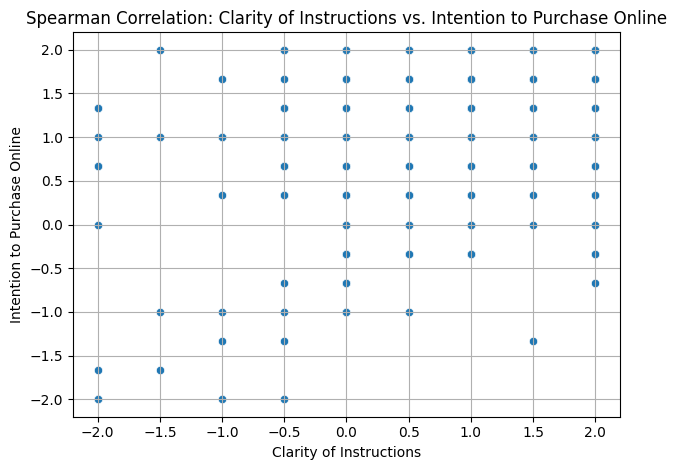

In [47]:
test_null_hypothesis("Clarity of Instructions", "Intention to Purchase Online")

## 9. Response Time has no impact on intention to purchase online.

Null hypothesis(H0): no correlation between Response Time and intention to purchase online

Alternative hypothesis(H1):correlation exists between Response Time and intention to purchase online

Spearman correlation (rho) = 0.053, p-value = 0.1333
Fail to reject the null hypothesis (no statistically significant monotonic correlation).


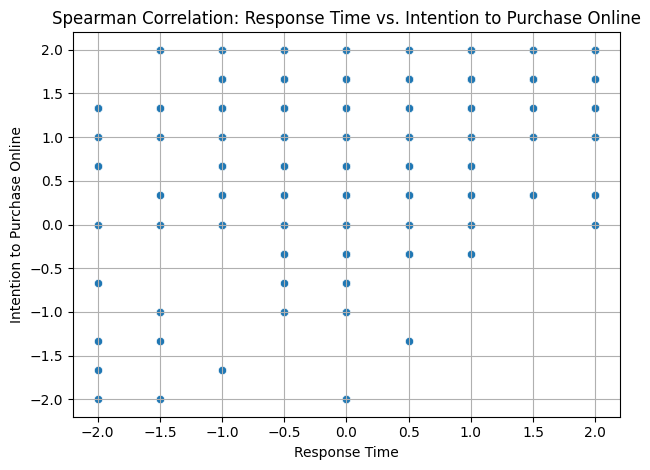

In [46]:
test_null_hypothesis("Response Time", "Intention to Purchase Online")

## 10.  Error handling has no impact on intention to purchase online

Null hypothesis(H0): no correlation between  Error handling and intention to purchase online

Alternative hypothesis(H1):correlation exists between  Error handling and intention to purchase online

Spearman correlation (rho) = 0.087, p-value = 0.0138
Reject the null hypothesis (statistically significant monotonic correlation).


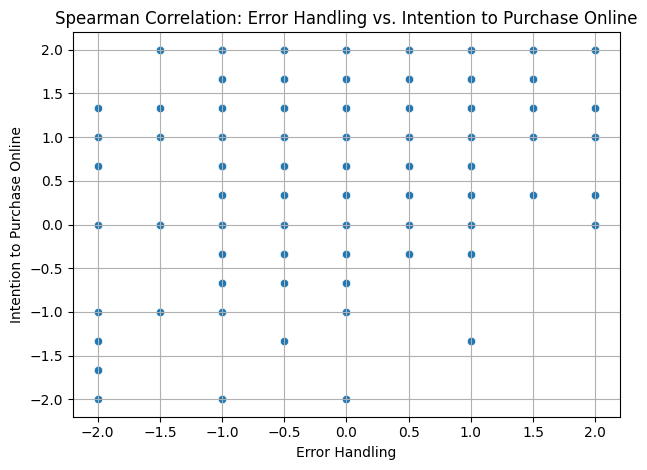

In [45]:
test_null_hypothesis("Error Handling", "Intention to Purchase Online")